In [58]:
#imports pandas and shorten the name
import pandas as pd

#import numpy so you can use arrays and get random numbers and shorten the name
import numpy as np

#import matplotlib.pyplot so you can make plots and charts and shorten the name
import matplotlib.pyplot as plt

#import requests so you can make API calls
import requests

#import time so you can use dates and timepoints
import time


#import json so python can make sense of the data from the API call
import json

#import the ability to do linear regressions from the scipy.stats package
from scipy.stats import linregress

#import the API key for OpenWeather from the config file
from resource import api_key

#import the ability to find the nearest city to a set of coordinates 
#link is pip install citipy
from citipy import citipy




In [2]:
#create output file to use later
output_data_file = "output_data/cities.csv"

Generate Cities List

In [3]:
# make the range of latitudes that encompasses the whole world
lat_range = (-90,90)

#make the range of longitudes that emcompasses the whole world
long_range = (-180,180)


In [4]:
#create an empty list to hold the latitudes and longitudes
lat_longs = []

#create an empty list to hold the city names
cities =[]



In [5]:
#explain what's going to go in the lat_long list
#first, generate the random latitudes using numpy/np
#get random numbers for -90 to 90 deg latitude, getting 1,500 to be sure that there will be 500 to work with
#put them in a list and keep adding rows until you get 1,500 rows
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)

#do the same for longitudes
long = np.random.uniform(lat_range[0], lat_range[1], size = 1500)

#merge the files together into lat_long
lat_longs = zip(lat,long)

In [6]:
#find the cities nearest to the lat_long points 
#this is a for statement
# for each element in the lat_long list, 
for lat_long in lat_longs:
    #use the notation from citipy website
    #city = citipy.nearest_city(lat, long)
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name
    
    #if the name is unique, add it to the list of names
    if city not in cities:
        cities.append(city)
        
#Check how many cities there are
len(cities)



594

In [7]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#this is the starting url without all the city names

url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"


#Make a list to hold all the city data
city_data = []

#make a log so if/when something goes wrong you can find it
print("Beginning Data Retreival                   ")
print("-------------------------------------------")

#create a counter for the log, set the opening number of the counter at 1
record_count = 1
set_count = 1


#Loop through the cities and find a temperature for each city
#for each city in the city list, create an api call for the temperature if the city has a unique value with a maximum of 500. 
#use enumerate to loop through the cities to get a list of the cities and an index of number of iterations. This will need to be appended to. 

for i, city in enumerate (cities):
    
    #if the index number for a city in the city table has a remainder of 0 and the index of that city is greater than or equal to 50
    if (i % 50 == 0 and i >=50):
        #set the index of that city at 1 and run the group of numbers until you get to the next mod 0 as a set. Then take a 60 second break.
        set_count += 1
        record_count= 0
        #make a confirmation notice of set breaks
        print ("End of set.")
        time.sleep(60)
   #add a url for each city
    city_url = f"{url}&q={city}&units={units}&appid={api_key}"
    
    #print the record and set numbers in the log
    print (f" Record {record_count} of Set {set_count} | {city}")
    print (city_url)
    
    #start the record count at 1
    record_count +=1
      
    #run the API request for the cities and return it in a json formatted list
    try:

        city_weather = requests.get(city_url).json()
        
        #here are the items we want
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humid = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #add the the information into the city_data list and give it an easy to read column name
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_long,
                          "Max Temp": city_temp,
                          "Humidity": city_humid,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
        
       #if any of the retrivial requests is missing,print NA on the log 
    
    except:    
        print("NA")
        pass
    
    print("Process Complete")
       

Beginning Data Retreival                   
-------------------------------------------
 Record 1 of Set 1 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?&q=tazovskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?&q=cape town&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 1 | margate
http://api.openweathermap.org/data/2.5/weather?&q=margate&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?&q=belushya guba&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 5 of Set 1 | bubaque
http://api.openweathermap.org/data/2.5/weather?&q=bubaque&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?&q=barentsburg&unit

 Record 0 of Set 2 | dombarovskiy
http://api.openweathermap.org/data/2.5/weather?&q=dombarovskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 1 of Set 2 | hobyo
http://api.openweathermap.org/data/2.5/weather?&q=hobyo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?&q=namibe&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 2 | roald
http://api.openweathermap.org/data/2.5/weather?&q=roald&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 2 | jimeta
http://api.openweathermap.org/data/2.5/weather?&q=jimeta&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 2 | brae
http://api.openwea

 Record 0 of Set 3 | paidha
http://api.openweathermap.org/data/2.5/weather?&q=paidha&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 1 of Set 3 | alta floresta
http://api.openweathermap.org/data/2.5/weather?&q=alta floresta&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 3 | muzhi
http://api.openweathermap.org/data/2.5/weather?&q=muzhi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?&q=castro&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 3 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?&q=saint-joseph&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 3 | karauzyak
http://api.openweathermap.org/data/2.5/weather?&q=karauzyak&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 6 of Set 3 | panjab
htt

 Record 0 of Set 4 | beinamar
http://api.openweathermap.org/data/2.5/weather?&q=beinamar&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 1 of Set 4 | tunduru
http://api.openweathermap.org/data/2.5/weather?&q=tunduru&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 2 of Set 4 | nalut
http://api.openweathermap.org/data/2.5/weather?&q=nalut&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 4 | sistranda
http://api.openweathermap.org/data/2.5/weather?&q=sistranda&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 4 | porto novo
http://api.openweathermap.org/data/2.5/weather?&q=porto novo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 4 | sharjah
http://api.openweathermap.org/data/2.5/weather?&q=sharjah&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 4 | mangrol
http://api.o

Process Complete
 Record 1 of Set 5 | saint-michel-des-saints
http://api.openweathermap.org/data/2.5/weather?&q=saint-michel-des-saints&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 5 | pinehurst
http://api.openweathermap.org/data/2.5/weather?&q=pinehurst&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 5 | kousseri
http://api.openweathermap.org/data/2.5/weather?&q=kousseri&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 5 | mehamn
http://api.openweathermap.org/data/2.5/weather?&q=mehamn&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 5 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?&q=quatre cocos&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 5 | marzuq
http://api.openweathermap.org/data/2.5/weather?&q=marzuq&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process 

Process Complete
 Record 2 of Set 6 | bereda
http://api.openweathermap.org/data/2.5/weather?&q=bereda&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 6 | utrecht
http://api.openweathermap.org/data/2.5/weather?&q=utrecht&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 6 | chicama
http://api.openweathermap.org/data/2.5/weather?&q=chicama&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 6 | promysla
http://api.openweathermap.org/data/2.5/weather?&q=promysla&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 6 of Set 6 | ormond beach
http://api.openweathermap.org/data/2.5/weather?&q=ormond beach&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 6 | ushtobe
http://api.openweathermap.org/data/2.5/weather?&q=ushtobe&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 6 | k

Process Complete
 Record 3 of Set 7 | inderborskiy
http://api.openweathermap.org/data/2.5/weather?&q=inderborskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 4 of Set 7 | barra patuca
http://api.openweathermap.org/data/2.5/weather?&q=barra patuca&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 7 | veraval
http://api.openweathermap.org/data/2.5/weather?&q=veraval&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 7 | saint anthony
http://api.openweathermap.org/data/2.5/weather?&q=saint anthony&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 7 | chapais
http://api.openweathermap.org/data/2.5/weather?&q=chapais&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 7 | sorland
http://api.openweathermap.org/data/2.5/weather?&q=sorland&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete


Process Complete
 Record 4 of Set 8 | gerga
http://api.openweathermap.org/data/2.5/weather?&q=gerga&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 8 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?&q=praia da vitoria&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 8 | almeirim
http://api.openweathermap.org/data/2.5/weather?&q=almeirim&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 8 | keti bandar
http://api.openweathermap.org/data/2.5/weather?&q=keti bandar&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 8 | babanusah
http://api.openweathermap.org/data/2.5/weather?&q=babanusah&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 9 of Set 8 | lokoja
http://api.openweathermap.org/data/2.5/weather?&q=lokoja&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Recor

Process Complete
 Record 5 of Set 9 | moose factory
http://api.openweathermap.org/data/2.5/weather?&q=moose factory&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 9 | kosa
http://api.openweathermap.org/data/2.5/weather?&q=kosa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 9 | biskamzha
http://api.openweathermap.org/data/2.5/weather?&q=biskamzha&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 9 | los amates
http://api.openweathermap.org/data/2.5/weather?&q=los amates&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 9 | peno
http://api.openweathermap.org/data/2.5/weather?&q=peno&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 9 | rocha
http://api.openweathermap.org/data/2.5/weather?&q=rocha&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 9 | camana

Process Complete
 Record 6 of Set 10 | hualmay
http://api.openweathermap.org/data/2.5/weather?&q=hualmay&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 10 | lukovetskiy
http://api.openweathermap.org/data/2.5/weather?&q=lukovetskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 10 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?&q=mwinilunga&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 10 | manjeshwar
http://api.openweathermap.org/data/2.5/weather?&q=manjeshwar&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 10 | yirol
http://api.openweathermap.org/data/2.5/weather?&q=yirol&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 11 of Set 10 | ukwa
http://api.openweathermap.org/data/2.5/weather?&q=ukwa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of 

Process Complete
 Record 7 of Set 11 | havelock
http://api.openweathermap.org/data/2.5/weather?&q=havelock&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 11 | nieuw amsterdam
http://api.openweathermap.org/data/2.5/weather?&q=nieuw amsterdam&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 11 | barbar
http://api.openweathermap.org/data/2.5/weather?&q=barbar&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 10 of Set 11 | asha
http://api.openweathermap.org/data/2.5/weather?&q=asha&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 11 | el alto
http://api.openweathermap.org/data/2.5/weather?&q=el alto&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 11 | jaru
http://api.openweathermap.org/data/2.5/weather?&q=jaru&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 1

Process Complete
 Record 8 of Set 12 | saint-francois
http://api.openweathermap.org/data/2.5/weather?&q=saint-francois&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 12 | banepa
http://api.openweathermap.org/data/2.5/weather?&q=banepa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 12 | bonthe
http://api.openweathermap.org/data/2.5/weather?&q=bonthe&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 12 | villa bruzual
http://api.openweathermap.org/data/2.5/weather?&q=villa bruzual&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 12 | danville
http://api.openweathermap.org/data/2.5/weather?&q=danville&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 12 | sisimiut
http://api.openweathermap.org/data/2.5/weather?&q=sisimiut&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete

In [13]:
#make the above into a dataframe
city_data_pd = pd.DataFrame(city_data)



In [14]:
#get city dataframe info
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        556 non-null    object 
 1   Lat         556 non-null    float64
 2   Long        556 non-null    float64
 3   Max Temp    556 non-null    float64
 4   Humidity    556 non-null    int64  
 5   Cloudiness  556 non-null    int64  
 6   Wind Speed  556 non-null    float64
 7   Country     556 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 34.9+ KB


In [10]:
#create the csv
#extract the relevant columns
clean_city_data_df = city_data_pd[["Lat", "Max Temp", "Humidity","Cloudiness","Wind Speed"]]
clean_city_data_df.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,67.4667,-39.62,100,65,3.40
1,-33.9258,75.27,68,0,17.27
2,51.3813,43.92,64,31,8.99
3,11.2833,78.10,62,42,16.37
4,60.9167,23.22,86,100,7.47


In [11]:
#make the csv with the extracted fields
clean_city_data_df.to_csv("output/city_data.csv", index=False, header=True)

Figure 1. Lattitude vs Temperature

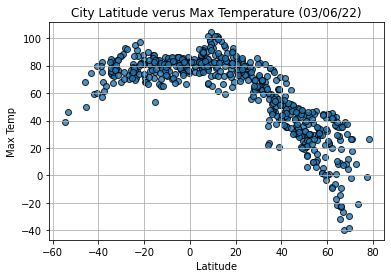

In [29]:
#Scatterplot of Lattitude versus Temperature
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Max Temp"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.1.png")  

plt.show()

Figure 2. Latitude vs. Humidity

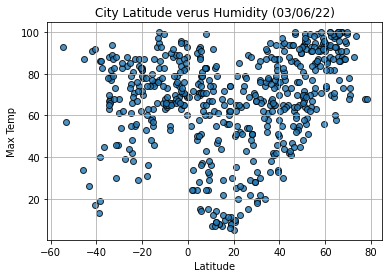

In [32]:
#Scatterplot of Lattitude versus Hudimity
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Humidity"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.2.png")  

plt.show()

Figure 3.  Latitute vs. Cloudiness


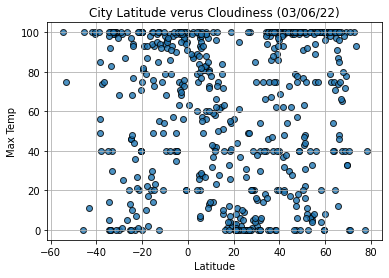

In [36]:
#Scatterplot of Lattitude versus Cloudiness
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Cloudiness"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Latitude vs Windspeed

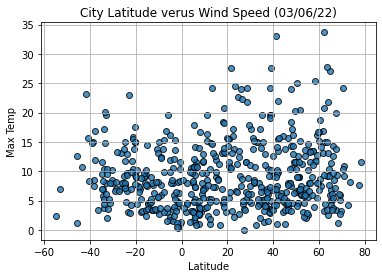

In [34]:
#Scatterplot of Lattitude versus Wind Speed
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Wind Speed"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Linear Regression

In [39]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [42]:
# Create dataframes to use with the linear regression function
#northern hemisphere
northern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] >=0)]
northern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         383 non-null    float64
 1   Max Temp    383 non-null    float64
 2   Humidity    383 non-null    int64  
 3   Cloudiness  383 non-null    int64  
 4   Wind Speed  383 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 18.0 KB


In [44]:
#southern hemisphere
southern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] <0)]
southern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 1 to 553
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         173 non-null    float64
 1   Max Temp    173 non-null    float64
 2   Humidity    173 non-null    int64  
 3   Cloudiness  173 non-null    int64  
 4   Wind Speed  173 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.1 KB


Max Temp Linear Regression


The r-value is: 0.7701038795930578


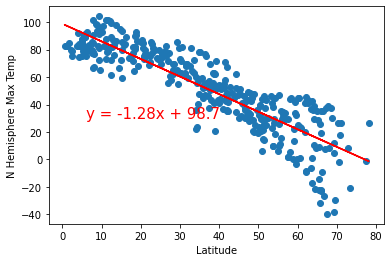

In [49]:
#Northern Hemisphere (y is the dependent variable/Max Temp)
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "N Hemisphere Max Temp", (6,30))

The r-value is: 0.12888189979385284


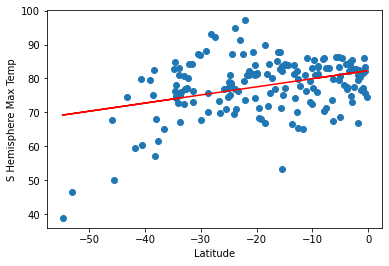

In [50]:
#Southern Hemisphere (y is the dependent variable/Max Temp)
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "S Hemisphere Max Temp", (6,30))

The r-value for the northern hemisphere is 0.77 and the r-value for the southern hemisphere is 0.12. This would indicate that the correlation between latitude and maximum temperature is much stronger in the northern hemisphere than in the southern.

Humidity(%) Linear Regression

The r-value is: 0.26447428644158494


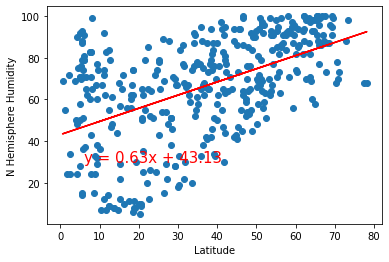

In [51]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "N Hemisphere Humidity", (6,30))

The r-value is: 0.059619303284577395


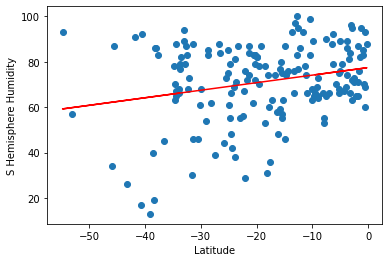

In [52]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "S Hemisphere Humidity", (6,30))

The r-value for the northern hemisphere is 0.2 and for the southern it is 0.06. This indicates that humidity and latitued is not highly correlated. 

Cloudiness Linear Regression

The r-value is: 0.028933422394616933


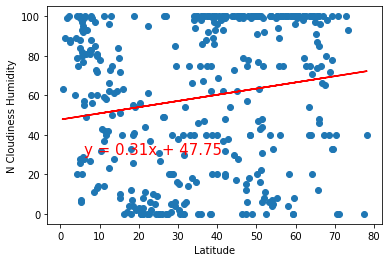

In [53]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "N Cloudiness", (6,30))

The r-value is: 0.03343600719536798


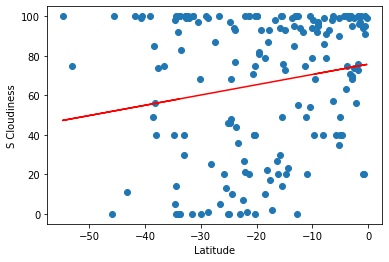

In [55]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "S Cloudiness", (6,30))

The r-values for both the northern & southern hemispheres are less than .1, indicating that latitude and cloudiness are not highly correlated. 

Wind Speed Linear Regression

The r-value is: 0.011401784652247008


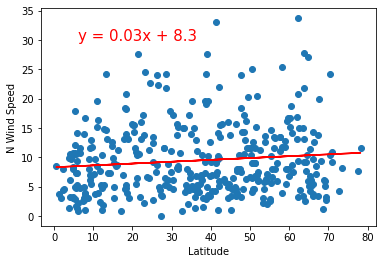

In [56]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "N Wind Speed", (6,30))

The r-value is: 0.050195935212126674


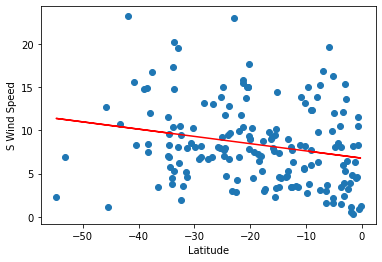

In [57]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "S Wind Speed", (6,30))

The r-values for the northern hemisphere and the southern hemisphere are again very low. Wind speed and latitude do not appear to be highly correlated. 